In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
import glob
# Obtenemos una lista de rutas de archivos .png en la carpeta "data_svm/Pedestrian"
pedestrian = glob.glob("data_svm/Pedestrian/*.png")
# Obtenemos una lista de rutas de archivos .png en la carpeta "data_svm/nonPedestrian"
no_pedestrian= glob.glob("data_svm/nonPedestrian/*.png")

In [3]:
# Obtenemos la longitud de la lista "pedestrian"
len(pedestrian)

902

In [4]:
# Obtenemos la longitud de la lista "no_pedestrian"
len(no_pedestrian)

1212

Original Dimensions :  (826, 1124, 3)


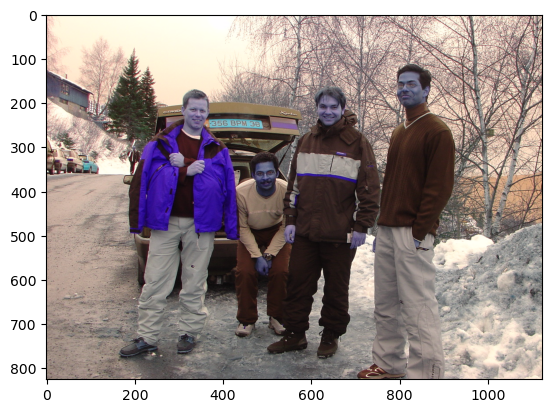

In [5]:
# Leemos una imagen en color utilizando la ruta del archivo en la posición 10 de la lista "pedestrian"
img_color= cv2.imread(pedestrian[10])
print('Original Dimensions : ',img_color.shape)
plt.imshow(img_color)

In [6]:
def load_images(files, label):    
   
    for img_path in files:
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128),interpolation = cv2.INTER_AREA)  # Cambiar el tamaño de la imagen

            images.append(img)
            labels.append(label)   

In [7]:
images = []
labels = []
load_images(pedestrian,1)
load_images(no_pedestrian,0)
images_arr = np.array(images)
labels_arr = np.array(labels)

Resized Dimensions :  (128, 128, 3)


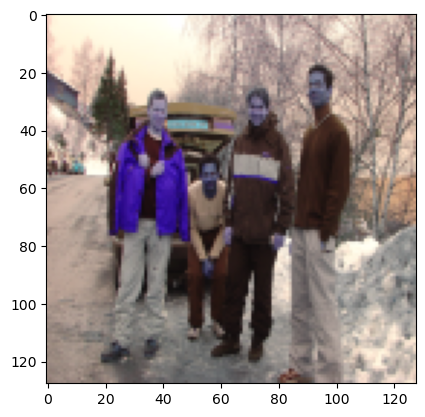

In [8]:
print('Resized Dimensions : ',images[10].shape)
plt.imshow(images[10])

In [9]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images_arr, labels_arr, test_size=0.2, random_state=42)

# Normalizar los valores de píxel en el rango [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convertir las etiquetas en codificación one-hot
num_classes = len(np.unique(labels))
#y_train = to_categorical(y_train, num_classes)
#y_test = to_categorical(y_test, num_classes)


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Usamos una neurona de salida con activación sigmoide

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
y_train[0]

0

In [12]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")


Epoch 1/10
53/53 [==============================] - 12s 216ms/step - loss: 0.6007 - accuracy: 0.7569
Epoch 2/10
53/53 [==============================] - 11s 212ms/step - loss: 0.2927 - accuracy: 0.8776
Epoch 3/10
53/53 [==============================] - 11s 215ms/step - loss: 0.2089 - accuracy: 0.9089
Epoch 4/10
53/53 [==============================] - 11s 212ms/step - loss: 0.1639 - accuracy: 0.9379
Epoch 5/10
53/53 [==============================] - 11s 212ms/step - loss: 0.1147 - accuracy: 0.9521
Epoch 6/10
53/53 [==============================] - 11s 205ms/step - loss: 0.0712 - accuracy: 0.9763
Epoch 7/10
53/53 [==============================] - 11s 212ms/step - loss: 0.0495 - accuracy: 0.9829
Epoch 8/10
53/53 [==============================] - 11s 215ms/step - loss: 0.0250 - accuracy: 0.9929
Epoch 9/10
53/53 [==============================] - 11s 212ms/step - loss: 0.0121 - accuracy: 0.9982
Epoch 10/10
53/53 [==============================] - 11s 213ms/step - loss: 0.0083 - accura